In [14]:
# Loading the required packages to run this notebook
from src.visualisation.SummaryModels import SummaryModels
import pandas as pd

# Default model setup - Fishing vessels only - Same dates & ROI 
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. Compare results for fishing vessels, cargo and tankers, and fishing, cargo, and tankers. The comparison is done on the fishing vessel only validation set used during the training of fishing vessel VRNN model (see 'Explore Training & Validation Curves - Fishing Vessels.ipynb')

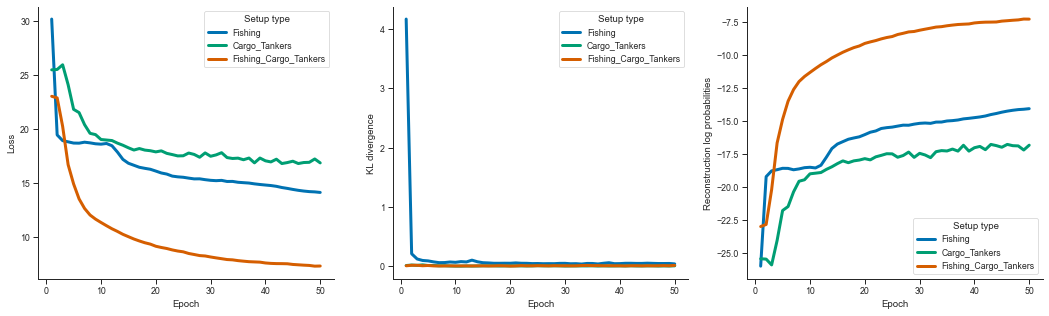

In [15]:
# Use the SummaryModels class
model_prefix = "Fishing_vessels_only_"
summary_models = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", model_prefix=model_prefix)
df_fish = summary_models.load_curves_df("Fishing", validation_only=True)
summary_models = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", model_prefix=model_prefix)
df_carg_tank = summary_models.load_curves_df("Cargo_Tankers", validation_only=True)
summary_models = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600", model_prefix=model_prefix)
df_fish_carg_tank = summary_models.load_curves_df("Fishing_Cargo_Tankers", validation_only=True)

# Combine the different vessel type date frames 
df = pd.concat([df_fish, df_carg_tank, df_fish_carg_tank])
df.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue = "Setup type"
hue_order = ["Fishing", "Cargo_Tankers", "Fishing_Cargo_Tankers"]
summary_models.plot_curves(df[df["Data set type"] == "Validation"], hue, hue_order)

# Default model setup - Fishing vessels only - Different dates 
Use the VRNN model, 100 dimensional latent and recurrent laten space, and no batch normalization, scheduler, or KL annealing. The comparison is now done on the new fishing vessel only validation set sampled from 01.05.2019 - 31.05.2019

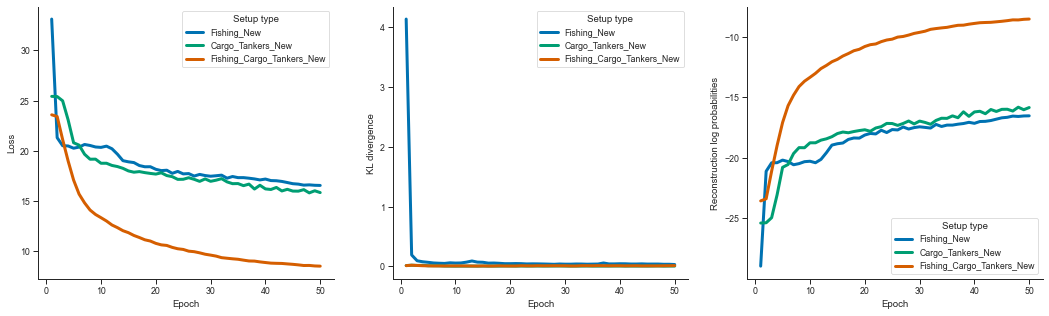

In [16]:
# Use the SummaryModels class
model_prefix = "New_Fishing_vessels_only_"
summary_models = SummaryModels("RegionBornholm_01062019_30092019_Fish_14400_86400_600", model_prefix=model_prefix)
df_fish = summary_models.load_curves_df("Fishing_New", validation_only=True)
summary_models = SummaryModels("RegionBornholm_01062019_30092019_CargTank_14400_86400_600", model_prefix=model_prefix)
df_carg_tank = summary_models.load_curves_df("Cargo_Tankers_New", validation_only=True)
summary_models = SummaryModels("RegionBornholm_01062019_30092019_FishCargTank_14400_86400_600", model_prefix=model_prefix)
df_fish_carg_tank = summary_models.load_curves_df("Fishing_Cargo_Tankers_New", validation_only=True)

# Combine the different vessel type date frames 
df_new = pd.concat([df_fish, df_carg_tank, df_fish_carg_tank])
df_new.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue_order = ["Fishing_New", "Cargo_Tankers_New", "Fishing_Cargo_Tankers_New"]
summary_models.plot_curves(df_new[df_new["Data set type"] == "Validation"], hue, hue_order)

# Default model setup - Fishing vessels only - Comparison
Compare the two setups shown above in one figure


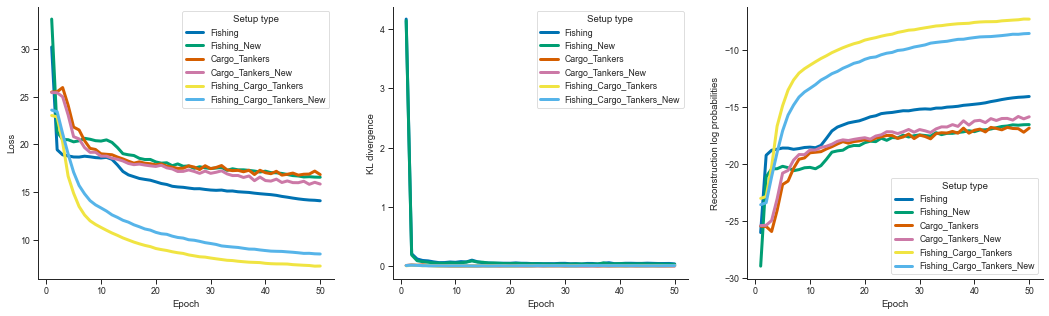

In [17]:
# Combine the different vessel type date frames 
df_compare = pd.concat([df, df_new])
df_compare.reset_index(drop=True, inplace=True)

# Plot the learning curves
hue = "Setup type"
hue_order = ["Fishing", "Fishing_New", "Cargo_Tankers", "Cargo_Tankers_New", 
             "Fishing_Cargo_Tankers", "Fishing_Cargo_Tankers_New"]
summary_models.plot_curves(df_compare[df_compare["Data set type"] == "Validation"], hue, hue_order)